# Overfitting - regularization
## L2 and L1 regularization for linear estimators

In [71]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()  # import dataset

In [72]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [73]:
boston.data.shape

(506, 13)

In [74]:
boston.target.shape

(506,)

In [75]:
# Analyse the dataset
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [76]:
import numpy as np
import pandas as pd
 
bos = pd.DataFrame(boston.data)  # converting to pandas
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [78]:
X = boston.data
y = boston.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=15)  # splitting the data(test size is 20%)

In [79]:
X.shape[0]

506

In [80]:
float(X_train.shape[0]) / float(X.shape[0])  # quick check of training dataset size

0.7984189723320159

In [81]:
float(X_test.shape[0]) / float(X.shape[0])  # another check for testing dataset

0.2015810276679842

**Example 2:**

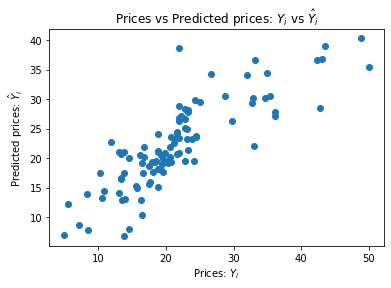

In [82]:
# Creating an object
regr = LinearRegression()

# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_pred = regr.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

**Wnioski:** An ideal scatter should look like straight line (y=ax), where every price is equal to predicted price.

**Example 3:**

In [83]:
mean_squared_error(Y_test, Y_pred)  # calculated MSE

23.81224546508062

**Example 4:**

In [84]:
regr.score(X_test, Y_test)  # calculated score

0.6920749038652151

In [85]:
# To simplify, I use Pipeline 
pipe = Pipeline([('scaler_1', StandardScaler()),
                ('scaler_2', PolynomialFeatures(degree=2)),
                ('estimator', LinearRegression())])

# Learning model on training data
pipe.fit(X_train, Y_train)
# Predicting values using test data
Y_pred_new = pipe.predict(X_test)

In [86]:
mean_squared_error(Y_test, Y_pred_new)  # calculated MSE

10.425781672024263

In [87]:
pipe.score(X_test, Y_test)  # calculated score

0.8651802985843494

**Example 5:**

In [88]:
# Creating an object (L1)
reg_Lasso = Lasso(alpha = 0.1)

# Learning model on training data
reg_Lasso.fit(X_train, Y_train)
# Predicting values using test data
Y_pred_lasso = reg_Lasso.predict(X_test)

In [89]:
mean_squared_error(Y_test, Y_pred_lasso)  # calculated MSE

22.56484102123047

In [90]:
reg_Lasso.score(X_test, Y_test)  # calculated score

0.7082055595757313

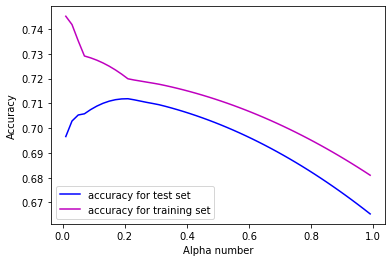

In [91]:
# There I compare the accuracy of training and test sets for different alpha values for Lasso model
params = np.arange(0.01, 1, 0.02)
accuracy_test = np.zeros(params.shape)
accuracy_train = np.zeros(params.shape)

for i, alpha in enumerate(params):
    reg_Lasso_p = Lasso(alpha = alpha)
    reg_Lasso_p.fit(X_train, Y_train)
    Y_pred_lasso_test = reg_Lasso_p.predict(X_test)
    Y_pred_lasso_train = reg_Lasso_p.predict(X_train)
    accuracy_test[i] = reg_Lasso_p.score(X_test, Y_test)
    accuracy_train[i] = reg_Lasso_p.score(X_train, Y_train)
    
plt.plot(params, accuracy_test, '-b', label='accuracy for test set')
plt.plot(params, accuracy_train, '-m', label='accuracy for training set')
plt.xlabel('Alpha number')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.show()

**Example 6:**

C:\Users\Filip\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.381417686789064, tolerance: 3.4724242079207923
  model = cd_fast.enet_coordinate_descent(


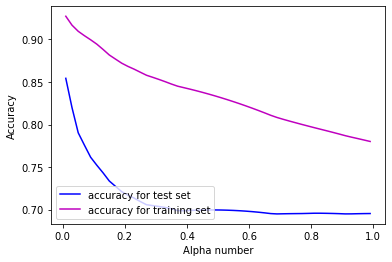

In [96]:
# There I use all standarization process via Pipeline and same as above, compare training and test data accuracy based on alpha
params = np.arange(0.01, 1, 0.02)
accuracy_test = np.zeros(params.shape)
accuracy_train = np.zeros(params.shape)

for i, alpha in enumerate(params):
    pipe = Pipeline([('scaler_1', StandardScaler()),
                ('scaler_2', PolynomialFeatures(degree=2)),
                ('estimator', Lasso(alpha = alpha))])
    pipe.fit(X_train, Y_train)
    accuracy_test[i] = pipe.score(X_test, Y_test)
    accuracy_train[i] = pipe.score(X_train, Y_train)
    
plt.plot(params, accuracy_test, '-b', label='accuracy for test set')
plt.plot(params, accuracy_train, '-m', label='accuracy for training set')
plt.xlabel('Alpha number')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.show()

In [93]:
# Creating an object (L2)
reg_Ridge = Ridge(alpha = 0.1)

# Learning model on training data
reg_Ridge.fit(X_train, Y_train)
# Predicting values using test data
Y_pred_Ridge = reg_Ridge.predict(X_test)

In [94]:
mean_squared_error(Y_test, Y_pred_Ridge)  # calculated MSE

23.67985135521677

In [95]:
reg_Ridge.score(X_test, Y_test)  # calculated score

0.6937869418612659

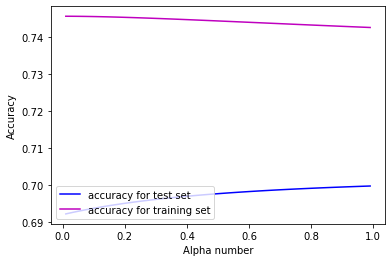

In [97]:
# There I compare the accuracy of training and test sets for different alpha values for Ridge model
params = np.arange(0.01, 1, 0.02)
accuracy_test = np.zeros(params.shape)
accuracy_train = np.zeros(params.shape)

for i, alpha in enumerate(params):
    reg_Ridge_p = Ridge(alpha = alpha)
    reg_Ridge_p.fit(X_train, Y_train)
    Y_pred_Ridge_test = reg_Ridge_p.predict(X_test)
    Y_pred_Ridge_train = reg_Ridge_p.predict(X_train)
    accuracy_test[i] = reg_Ridge_p.score(X_test, Y_test)
    accuracy_train[i] = reg_Ridge_p.score(X_train, Y_train)
    
plt.plot(params, accuracy_test, '-b', label='accuracy for test set')
plt.plot(params, accuracy_train, '-m', label='accuracy for training set')
plt.xlabel('Alpha number')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.show()

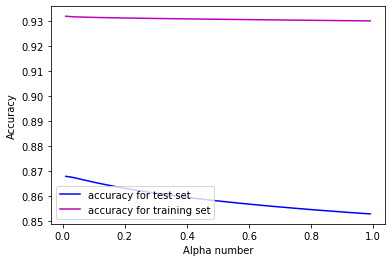

In [98]:
# There I use all standarization process via Pipeline and same as above, compare training and test data accuracy based on alpha
params = np.arange(0.01, 1, 0.02)
accuracy_test = np.zeros(params.shape)
accuracy_train = np.zeros(params.shape)

for i, alpha in enumerate(params):
    pipe = Pipeline([('scaler_1', StandardScaler()),
                ('scaler_2', PolynomialFeatures(degree=2)),
                ('estimator', Ridge(alpha = alpha))])
    pipe.fit(X_train, Y_train)
    accuracy_test[i] = pipe.score(X_test, Y_test)
    accuracy_train[i] = pipe.score(X_train, Y_train)
    
plt.plot(params, accuracy_test, '-b', label='accuracy for test set')
plt.plot(params, accuracy_train, '-m', label='accuracy for training set')
plt.xlabel('Alpha number')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.show()

## **Regularization for logistic regression**

**Dataset A**

In [99]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target

In [100]:
df  # displaying the data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.3)  # splitting the data

logreg_l1 = LogisticRegression(penalty='l1', C=1, solver='liblinear')  # logistic model with L1 regularization

logreg_l1.fit(X_train, Y_train)  # train the model
Y_pred_l1 = logreg_l1.predict(X_test)  # prediction

In [107]:
mean_squared_error(Y_test, Y_pred_l1)  # calculated MSE

0.04678362573099415

In [108]:
logreg_l1.score(X_test, Y_test)  # calculated score

0.9532163742690059

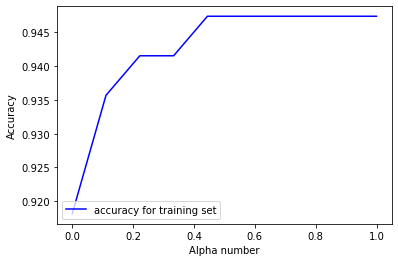

In [109]:
# Plot the accuracy of logistic regression for different regularization parameter 'C'
params = np.linspace(0.0001, 1, 10)
accuracy = np.zeros(params.shape)

for i, c in enumerate(params):
    logreg_l2 = LogisticRegression(penalty='l2', C=c, solver='liblinear')  # logistic model with L2 regularization
    logreg_l2.fit(X_train, Y_train)
    accuracy[i] = logreg_l2.score(X_test, Y_test)
    
plt.plot(params, accuracy, '-b', label='accuracy for training set')
plt.xlabel('Alpha number')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.show()

## Regularization for kNN method

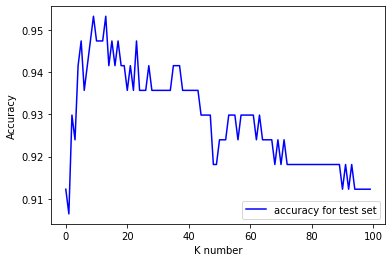

In [110]:
out = []
k = 100

for i in range(k):
    classifier = KNeighborsClassifier(i+1)  # create model
    classifier.fit(X_train, Y_train)
    accuracy = classifier.score(X_test, Y_test)  # test set
    out.append(accuracy)
    
    
plt.plot(out, '-b', label='accuracy for test set')  # plot the accuracy based on k 
plt.xlabel('K number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [111]:
best_k = out.index(max(out))  # finding best k-value
best_k

9

## Decision trees optimization

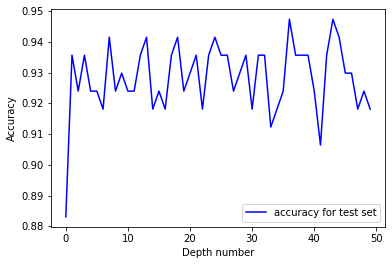

In [112]:
out = []
k = 50

for depth in range(k):
    classifier = tree.DecisionTreeClassifier(max_depth=depth+1)  # create model
    classifier.fit(X_train, Y_train)
    accuracy = classifier.score(X_test, Y_test)  # test set
    out.append(accuracy)
    
    
plt.plot(out, '-b', label='accuracy for test set')  # plot the accuracy based on DEPTH 
plt.xlabel('Depth number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [113]:
best_depth = out.index(max(out))  # finding best DEPTH-value
best_depth

36